# Utilities
Author:

J. Angevaare // <j.angevaare@nikhef.nl> // 2020-06-05




## Useful tools for analyses
In this notebook we will learn how to:
  - Fit
  - Do basic pandas operations

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

### Fitting

Let's first make some data and then fit it

In [2]:
lin_data = {'x':np.linspace(0,10,11), 
            'y':np.linspace(0,20,11)}
lin_data = pd.DataFrame(lin_data)
lin_data

,x,y
0,0.0,0.0
1,1.0,2.0
2,2.0,4.0
3,3.0,6.0
4,4.0,8.0
5,5.0,10.0
6,6.0,12.0
7,7.0,14.0
8,8.0,16.0
9,9.0,18.0


Text(0, 0.5, 'y')

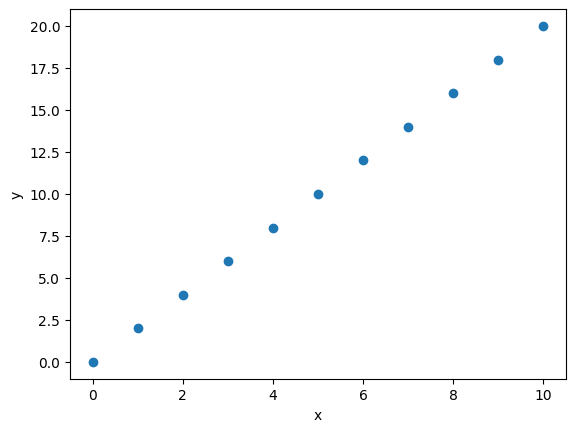

In [3]:
# Great let's plot this
plt.scatter(lin_data['x'], lin_data['y'])
plt.xlabel('x')
plt.ylabel('y')

Alright that's quite boring, lets add some randomness to this data

In [4]:
# Make a new dataframe
lin_data_rand = pd.DataFrame()
# keep x the same
lin_data_rand['x'] = lin_data['x']
# change y values by adding random_gitter
random_gitter = ( 2 * np.random.random(size = len(lin_data)) - 1)
lin_data_rand['y'] = lin_data['y'] + random_gitter
lin_data_rand

,x,y
0,0.0,-0.928892
1,1.0,2.833502
2,2.0,3.153316
3,3.0,5.467109
4,4.0,8.742635
5,5.0,10.899041
6,6.0,12.886468
7,7.0,14.003842
8,8.0,16.475030
9,9.0,17.711309


In [5]:
# Maybe good to know the random gitter is in the interval [-1,1]
random_gitter

array([-0.92889164,  0.83350178, -0.84668422, -0.53289062,  0.74263452,
        0.89904066,  0.88646846,  0.0038418 ,  0.47503029, -0.28869116,
        0.07290772])

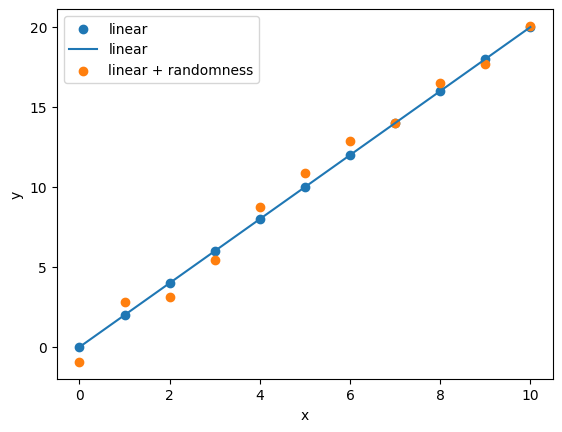

In [6]:
# Let's plot this randomized data and compare it to the other dataset
# Great let's plot this boring set
plt.scatter(lin_data['x'], lin_data['y'], label = 'linear')
plt.plot(lin_data['x'], lin_data['y'], label = 'linear')
# Great let's plot this randomized dataset
plt.scatter(lin_data_rand['x'], lin_data_rand['y'], label = 'linear + randomness')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

Great we see indeed that the data is somewhat random compared to the previous dataset 

# Fitting
Let's fit the function above

In [7]:
def linear_function(x, a, b):
    """Function y = a * x + b"""
    return a * x + b

This example is rather dull since we already know that the correct answer is that: 
    - a = 2
    - b = 0
   
for the set above (you can also see by eye easily)

In [8]:
# plot that this is true

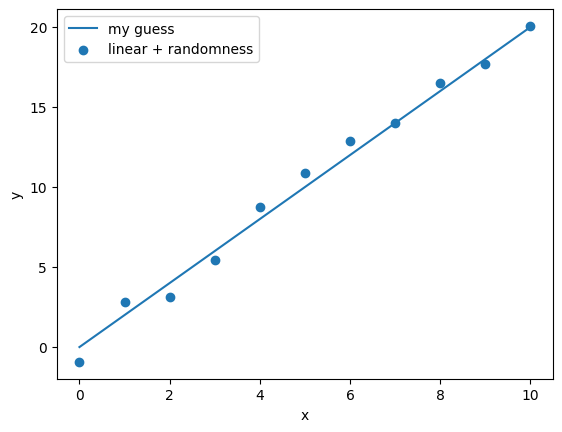

In [9]:
x = lin_data_rand['x']
plt.plot(x, linear_function(x, 2, 0), label = 'my guess')
plt.scatter(lin_data_rand['x'], lin_data_rand['y'], label = 'linear + randomness')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

In [10]:
# First, read the documentation:
??curve_fit

In [11]:
# Do a fit
fit_res = curve_fit(
    linear_function, # Function without ()!
    lin_data_rand['x'], # x data
    lin_data_rand['y'], # y data
    p0 = [2,0], # My guess for [a,b]. NB: make sure the order is function(x, a, b) that order should match here!
    sigma = None, # Here I could add some errors on y to take into account for fitting but I have none at the moment
    )

In [12]:
# Alright lets have a look at what fit_res looks like

In [13]:
fit_res

(array([ 2.05184243, -0.13955146]),
 array([[ 0.00461132, -0.02305659],
        [-0.02305659,  0.16139608]]))

In [14]:
# What is this????
print(f'Fit results [a, b] = {fit_res[0]}\nCovariance matrix =\n {fit_res[1]}')

Fit results [a, b] = [ 2.05184243 -0.13955146]
Covariance matrix =
 [[ 0.00461132 -0.02305659]
 [-0.02305659  0.16139608]]


In [15]:
# So for the error on x and y we can do:
a_fit = fit_res[0][0]
a_fit_variance = fit_res[1][0][0]
a_fit_err = np.sqrt(a_fit_variance)
print(f'Fitted value for a = %.2f +/- %.2f'%(a_fit, a_fit_err))

Fitted value for a = 2.05 +/- 0.07


In [16]:
# for b we can do the same (only we need the second entry, ergo index 1
# So for the error on x and y we can do:
b_fit = fit_res[0][1]
b_fit_variance = fit_res[1][1][1]
b_fit_err = np.sqrt(a_fit_variance)
print(f'Fitted value for b = %.2f +/- %.2f'%(b_fit, b_fit_err))

Fitted value for b = -0.14 +/- 0.07


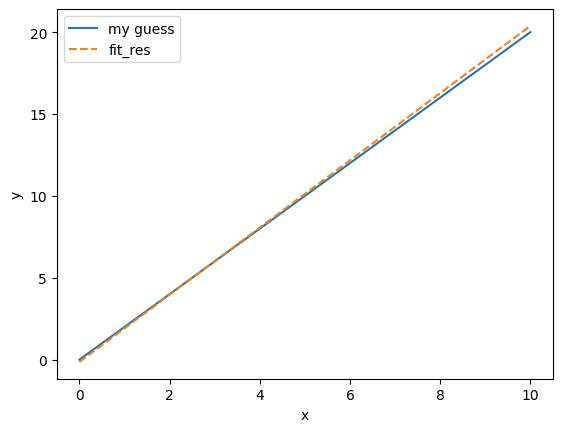

In [17]:
# For completeness let's compare our guess to the data:
# You see the two verlap perfectly (phew!)
plt.plot(x, linear_function(x, 2, 0), label = 'my guess')
plt.plot(x, linear_function(x, a_fit, b_fit), linestyle = '--', label = 'fit_res')
# plt.scatter(lin_data_rand['x'], lin_data_rand['y'], label = 'linear + randomness')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

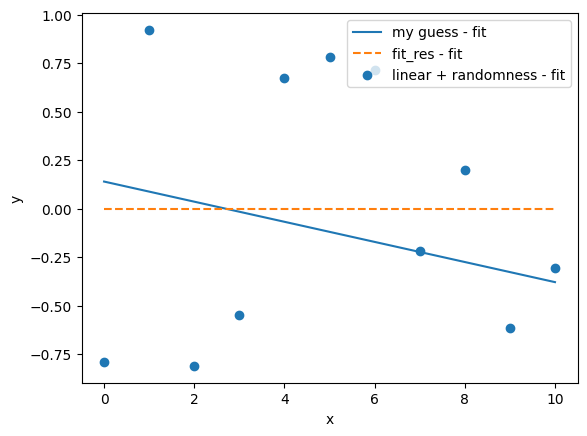

In [18]:
# If you are not convinced we can also subtract the one by the other:
# For completeness let's compare our guess to the data:
# You see the two verlap perfectly (phew!)
subtract = linear_function(x, a_fit, b_fit)
plt.plot(x, linear_function(x, 2, 0) - subtract, label = 'my guess - fit')
# The line below should be at 0 (since we subtract it with its own values)
plt.plot(x, linear_function(x, a_fit, b_fit) - subtract, linestyle = '--', label = 'fit_res - fit')
plt.scatter(lin_data_rand['x'], lin_data_rand['y'] - subtract, label = 'linear + randomness - fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

In [19]:
# we can also fit a polynomal of order 2:
def parabolic_function(x, a, b, c):
    """Function y = a * x^2 + b * x + c"""
    return a * (x**2) + b * x + c

In [20]:
# Do a fit
fit_res_parabole = curve_fit(
    parabolic_function, # Function without ()!
    lin_data_rand['x'], # x data
    lin_data_rand['y'], # y data
    p0 = [0, 2, 0], # My guess for [a,b, c]. NB: make sure the order is function(x, a, b, c) that order should match here!
    sigma = None, # Here I could add some errors on y to take into account for fitting but I have none at the moment
    )
print(f'You can have a look at the covariance matrix yourself. The best fit parameters [a,b,c] are {fit_res_parabole[0]}')

You can have a look at the covariance matrix yourself. The best fit parameters [a,b,c] are [-0.03458891  2.39773149 -0.65838506]


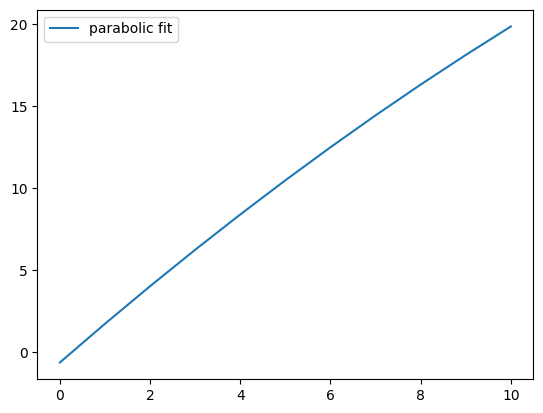

In [21]:
# since the value of a is close to zero, this is approximately linear in values of x considered:
plt.plot(x, parabolic_function(x, 
                               fit_res_parabole[0][0], # best fit a
                               fit_res_parabole[0][1], # best fit b
                               fit_res_parabole[0][2]), # best fit c
         label = 'parabolic fit')
plt.legend();

# Function for a normal ('Gaussian') distribution

In [22]:
# Stolen from https://stackoverflow.com/questions/14873203/plotting-of-1-dimensional-gaussian-distribution-function
def norm_gaussian(x, mu, sig):
    """mu is center and sig the standad deviation"""
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

def gaussian(x, mu, sig, norm):
    """mu is center, sig the standad deviation and norm is the overal normalization"""
    return norm * norm_gaussian(x, mu, sig)

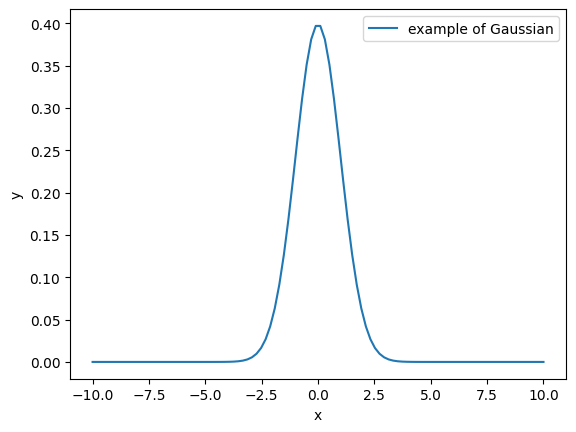

In [23]:
x_gaus = np.linspace(-10,10,100)
y_gaus = gaussian(x_gaus,
                  0, # center
                  1, # std
                  1  # norm
                 ) 
plt.plot(x_gaus,
         y_gaus, 
         label = 'example of Gaussian')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

# Basic pandas operations
Pandas dataframes are kind of a fancy way of keeping excel files. Here I'll show some basic tricks

In [24]:
# let'start with our previous set:
data = lin_data_rand.copy()
data

,x,y
0,0.0,-0.928892
1,1.0,2.833502
2,2.0,3.153316
3,3.0,5.467109
4,4.0,8.742635
5,5.0,10.899041
6,6.0,12.886468
7,7.0,14.003842
8,8.0,16.475030
9,9.0,17.711309


In [25]:
# Let's add x and y together like this
data['x_plus_y']  = data['x'] + data['y']
data

,x,y,x_plus_y
0,0.0,-0.928892,-0.928892
1,1.0,2.833502,3.833502
2,2.0,3.153316,5.153316
3,3.0,5.467109,8.467109
4,4.0,8.742635,12.742635
5,5.0,10.899041,15.899041
6,6.0,12.886468,18.886468
7,7.0,14.003842,21.003842
8,8.0,16.475030,24.475030
9,9.0,17.711309,26.711309


In [26]:
# Let's add a column showing a gausian based on x!
gaus_data = norm_gaussian(data['x'].values, 1, 1)
data['gaus'] = gaus_data
data

,x,y,x_plus_y,gaus
0,0.0,-0.928892,-0.928892,2.419707e-01
1,1.0,2.833502,3.833502,3.989423e-01
2,2.0,3.153316,5.153316,2.419707e-01
3,3.0,5.467109,8.467109,5.399097e-02
4,4.0,8.742635,12.742635,4.431848e-03
5,5.0,10.899041,15.899041,1.338302e-04
6,6.0,12.886468,18.886468,1.486720e-06
7,7.0,14.003842,21.003842,6.075883e-09
8,8.0,16.475030,24.475030,9.134720e-12
9,9.0,17.711309,26.711309,5.052271e-15


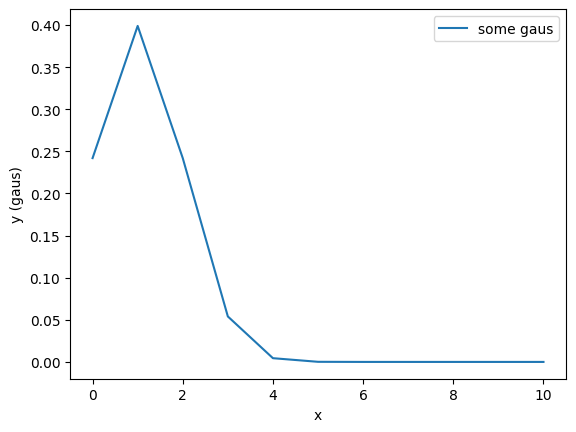

In [27]:
# Now I'm actually curious what we made:
plt.plot(data['x'],
        data['gaus'], label = 'some gaus')
plt.xlabel('x')
plt.ylabel('y (gaus)');
plt.legend()

### making selections
Now imagine that we want to make a selection based on the figure above where y (gaus) > 0.05. 

This can be done quite easily using the operators `==` or `<` and `>`. See the example below

In [28]:
# let's select data where the y gaus is > 0.05. We start with this data:
data

,x,y,x_plus_y,gaus
0,0.0,-0.928892,-0.928892,2.419707e-01
1,1.0,2.833502,3.833502,3.989423e-01
2,2.0,3.153316,5.153316,2.419707e-01
3,3.0,5.467109,8.467109,5.399097e-02
4,4.0,8.742635,12.742635,4.431848e-03
5,5.0,10.899041,15.899041,1.338302e-04
6,6.0,12.886468,18.886468,1.486720e-06
7,7.0,14.003842,21.003842,6.075883e-09
8,8.0,16.475030,24.475030,9.134720e-12
9,9.0,17.711309,26.711309,5.052271e-15


In [29]:
# check where this condition is true
data['gaus'] > 0.05

0      True
1      True
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
Name: gaus, dtype: bool

In [30]:
# This might be new, you can select data based on the above array of True and False like this:
selection = data['gaus'] > 0.05
data[selection]

,x,y,x_plus_y,gaus
0,0.0,-0.928892,-0.928892,0.241971
1,1.0,2.833502,3.833502,0.398942
2,2.0,3.153316,5.153316,0.241971
3,3.0,5.467109,8.467109,0.053991


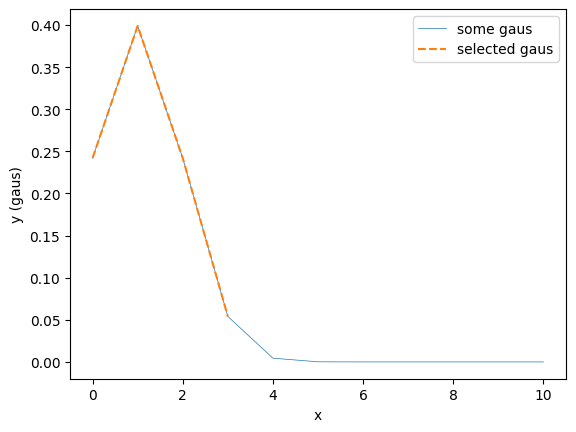

In [31]:
# let's plot this
data_sel = data[selection]
plt.plot(data['x'],
         data['gaus'], 
         linewidth = 0.5,
         label = 'some gaus')
plt.plot(data_sel['x'],
         data_sel['gaus'],
         linestyle = '--',
         label = 'selected gaus')

plt.xlabel('x')
plt.ylabel('y (gaus)')
plt.legend();

### More complex selections

In [32]:
# This might be new, you can select data based on the above array of True and False like this:
selection = (data['gaus'] > 0.01) & (data['gaus'] < 0.3)
selection

0      True
1     False
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
Name: gaus, dtype: bool

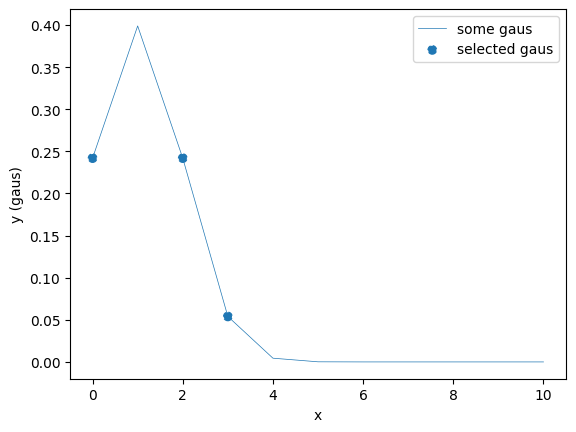

In [33]:
# let's plot this
data_sel = data[selection]
plt.plot(data['x'],
         data['gaus'], 
         linewidth = 0.5,
         label = 'some gaus')
plt.scatter(data_sel['x'],
         data_sel['gaus'],
         linestyle = '--',
         label = 'selected gaus')

plt.xlabel('x')
plt.ylabel('y (gaus)')
plt.legend();

# extract data from a hist

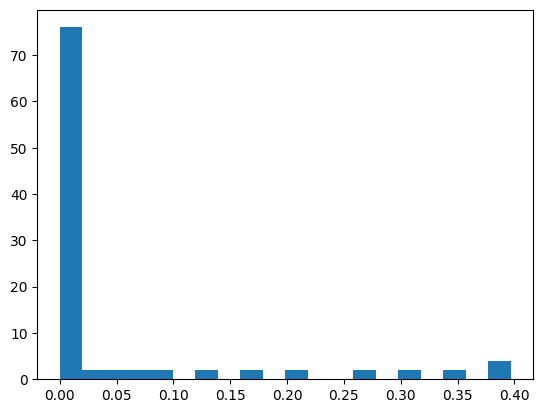

In [34]:
counts, bins, _ = plt.hist(y_gaus, bins = 20)

In [35]:
# The edges of 
bins
bin_centers = (bins[1:] + bins[:-1])/2
bin_centers

array([0.00992281, 0.02976842, 0.04961403, 0.06945964, 0.08930526,
       0.10915087, 0.12899648, 0.14884209, 0.16868771, 0.18853332,
       0.20837893, 0.22822454, 0.24807016, 0.26791577, 0.28776138,
       0.30760699, 0.32745261, 0.34729822, 0.36714383, 0.38698944])

<ErrorbarContainer object of 3 artists>

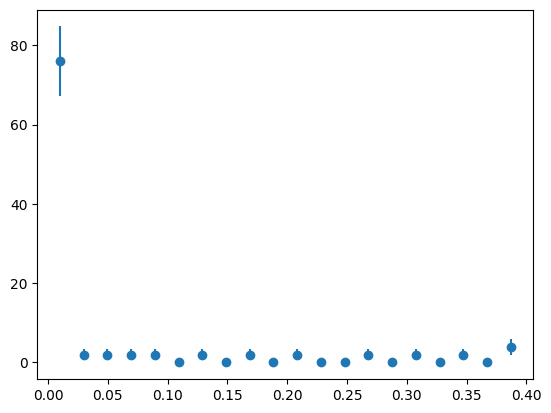

In [36]:
plt.errorbar(bin_centers, counts, np.sqrt(counts), linestyle = 'None', marker = 'o')

## Writing functions to be used in notebooks

If you want to have a function easily accessible in all your notebooks, all you have to do is adding a new function to the `RP2021/student_fuctions.py` such that you can easily use it here. For example, I've added a dummy function that will raise some error.

In [38]:
import RP2023 as rp

In [41]:
rp.some_function()

NotImplementedError: At the time of writing, there was no function here, you may want to add one yourself in  order to be able to open this. Also might be a good idea to write a better name than "some_function" because its not very descriptive